# Market Cap & EPS Analysis
In this analysis we will be exploring the mean, medium, and mode for various publically traded companies. To do this I scraped data from the Yahoo Finance website and created a csv file containing the ticker symbol, market cap, and eps for as many publically traded companies as I could using the the sec provided json that lists all publically traded companies. The data for market cap and eps is from 6/1/2023. In this analysis we will explore the median and mean Trailing Twelve Months EPS and market cap for micro-cap, small-cap, mid-cap, large-cap, and mega-cap stocks.

## Imports

In [39]:
import json
import pandas as pd
import matplotlib.pyplot as plt

## Plotting Functions
The following function is to help plot the market caps of the companies in a pie chart

In [40]:
# plot_market_caps(): Plots the markets caps of companies in a dataframe and labels the ones accounting for threshold_percentage or more of the total
def plot_market_caps(dataframe, threshold_percentage):
  # Create a chart of all companies
  labels = dataframe["ticker"]
  sizes = dataframe["market_cap"]
  # Calculate the percentages of the pie
  total = sum(sizes)
  percentages = [(size/total) for size in sizes]

  # Create a list to store the labels to be displayed
  display_labels = []

  # Iterate over the percentages and labels to determine which labels to display
  for i, (percentage, label) in enumerate(zip(percentages, labels)):
      if percentage > threshold_percentage:
          display_labels.append(f'{label} ({percentage*100:.2f}%)')
      else:
          display_labels.append('')

  plt.pie(sizes, labels=display_labels)
  # Update plt label size
  plt.rcParams['font.size'] = 5
  plt.show()

# plot_lens(): plots a pie chart showing the % makeup of all data
def plot_lens(labels, data, threshold_percentage):
    total = sum(data)
    percentages = [(size/total) for size in data]

    display_labels = []

    for i, (percentage, label) in enumerate(zip(percentages, labels)):
        if percentage > threshold_percentage:
          display_labels.append(f'{label} ({percentage*100:.2f}%)')
        else:
          display_labels.append('')
    plt.pie(data, labels=display_labels)
    plt.rcParams['font.size'] = 12
    plt.show()

## Loading, Cleaning, and Exploring the Data

In [41]:
# Load the csv file
df = pd.read_csv("./data/yahoo_finance.csv")

In [42]:
# Get the number of records in the dataframe
df.describe()

,market_cap,eps_ttm
count,8770.000000,8180.000000
mean,8.031280,0.367492
std,59.945430,25.709945
min,0.000000,-996.350000
25%,0.019804,-0.820000
50%,0.218916,-0.005000
75%,1.841750,1.500000
max,2833.000000,704.370000


In [43]:
# Drop rows with None as the Market Cap or EPS to clean the dataframe
df.dropna(inplace=True)

In [44]:
# Describe the data
df.describe()

,market_cap,eps_ttm
count,8179.000000,8179.000000
mean,8.329469,0.367527
std,60.086833,25.711516
min,0.000000,-996.350000
25%,0.034074,-0.820000
50%,0.272949,-0.005000
75%,2.130000,1.500000
max,2833.000000,704.370000


In [45]:
# Sort by Valuation
df.sort_values(by="market_cap", ascending=False, inplace=True)
df.head()

,date,ticker,market_cap,eps_ttm
0,2023-06-01,AAPL,2833.0,5.91
1,2023-06-01,MSFT,2473.0,9.23
8160,2023-06-01,GOOG,1576.0,4.45
2,2023-06-01,GOOGL,1574.0,4.47
3,2023-06-01,AMZN,1260.0,0.42


In [46]:
df.sort_values(by="eps_ttm", ascending=False, inplace=True)
df.head()

,date,ticker,market_cap,eps_ttm
8231,2023-06-01,FCNCB,17.750000,704.37
549,2023-06-01,FCNCA,18.308000,704.29
3358,2023-06-01,SBNC,0.438356,547.29
551,2023-06-01,NVR,18.087000,469.33
6979,2023-06-01,ALLR,0.004905,412.55


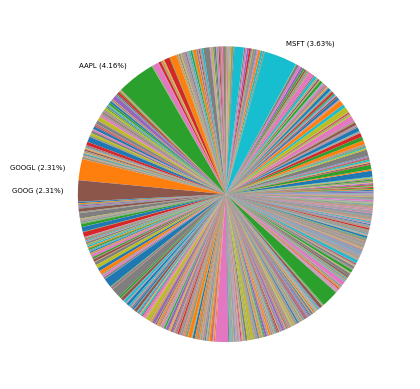

In [47]:
# Plot the market caps of all companies in a pie chart
plot_market_caps(df, 0.02)

The original dataset contained 9241 companies. Once we dropped the entries with None or NaN values we were left with 8179 entries left. Out of those 8179 etnries, the average market cap was 8.32 billion dollars. The average eps was $0.36 cenets per share. The company with the largest market cap is $AAPL at 2.833 Trillion. The company with the highest eps was FCNCB with an eps of $704.37.

## Micro-Cap
In this section, we will explore the median and mean market capitalization of a micro-cap stock. We will also explore the median and mean EPS (TTM) for a micro-cap stock.

In [48]:
# Create a dataframe of micro cap stocks
micro_df = df[(df['market_cap'] < .250)]
micro_df.head()

,date,ticker,market_cap,eps_ttm
6979,2023-06-01,ALLR,0.004905,412.55
7621,2023-06-01,BRGO,0.000000,292.34
4608,2023-06-01,MULN,0.128434,233.74
6070,2023-06-01,BBIG,0.028860,106.62
7144,2023-06-01,AGRX,0.004193,103.86


In [49]:
# Describe the micro_cap DataFrame
micro_df.describe()

,market_cap,eps_ttm
count,3989.000000,3989.000000
mean,0.060098,-2.195370
std,0.067263,29.283829
min,0.000000,-996.350000
25%,0.005998,-1.150000
50%,0.031813,-0.130000
75%,0.098625,0.020000
max,0.249882,412.550000


In [50]:
# Find the median market cap
median_market_cap_for_micro_cap = micro_df["market_cap"].median()
print("Median: " + str(median_market_cap_for_micro_cap))

Median: 0.031813


In [51]:
# Find the median eps
median_eps_for_micro_cap = micro_df["eps_ttm"].median()
print("Median: " + str(median_eps_for_micro_cap))

Median: -0.13


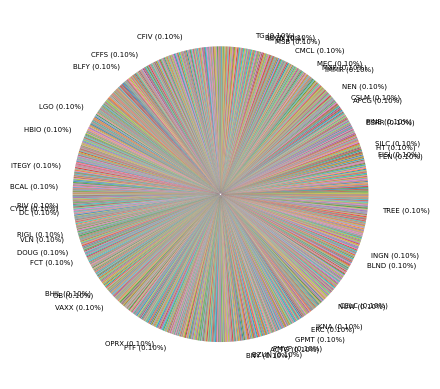

In [52]:
# Plot the market caps
plot_market_caps(micro_df, 0.001)

There were 3,989 micro-cap stocks in total. The mean market cap and eps ttm for a micro-cap stock was around $60 million and $-2.19 respectively. The median market cap and eps ttm for a micro cap stock was around $31 million and $-0.13 in respectively.

## Small-Cap
In this section, we will explore the median and mean market capitalization of a small-cap stock. We will also explore the median and mean EPS (TTM) for a small-cap stock.

In [53]:
# Create a dataframe of small cap stocks
small_df = df[(df['market_cap'] >= .250) & (df['market_cap'] < 2)]
small_df.head()

,date,ticker,market_cap,eps_ttm
3358,2023-06-01,SBNC,0.438356,547.29
3658,2023-06-01,BHRB,0.338250,195.77
2980,2023-06-01,BH-A,0.660598,117.25
2849,2023-06-01,FMCB,0.748226,105.69
2029,2023-06-01,GPOR,1.786000,64.88


In [54]:
# Describe the small_cap DataFrame
small_df.describe()

,market_cap,eps_ttm
count,2093.000000,2093.000000
mean,0.801753,0.804560
std,0.484327,14.095706
min,0.250133,-104.400000
25%,0.386381,-1.130000
50%,0.640485,0.010000
75%,1.136000,1.320000
max,1.999000,547.290000


In [55]:
# Find the median market cap
median_market_cap_for_small_cap = small_df["market_cap"].median()
print("Median: " + str(median_market_cap_for_small_cap))

Median: 0.640485


In [56]:
# Find the median eps
median_eps_for_small_cap = small_df["eps_ttm"].median()
print("Median: " + str(median_eps_for_small_cap))

Median: 0.01


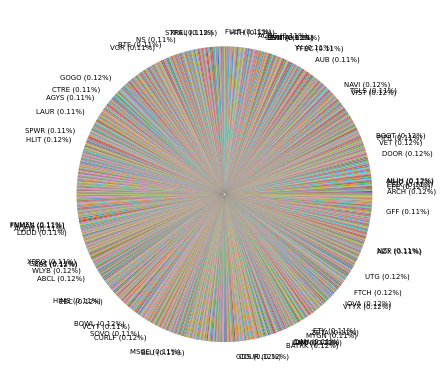

In [57]:
# Plot the market caps
plot_market_caps(small_df, 0.0011)

There were 2,093 small-cap stocks in total. The mean market cap and eps ttm for a small cap stock was $801 million and $0.80 respectively.The median market cap was $640 million with a median EPS (TTM) of $0.01

## Mid-Cap
In this section, we will explore the median and mean market capitalization of a small-cap stock. We will also explore the median and mean EPS (TTM) for a mid-cap stock.

In [58]:
# Create a dataframe of mid cap stocks
mid_df = df[(df['market_cap'] >= 2) & (df['market_cap'] < 10)]
mid_df.head()

,date,ticker,market_cap,eps_ttm
1315,2023-06-01,SEB,4.352,396.66
1966,2023-06-01,AMR,2.035,75.98
1640,2023-06-01,SDRL,2.903,57.65
1044,2023-06-01,CAR,6.744,55.27
1075,2023-06-01,CHRD,5.957,52.22


In [59]:
# Describe the small_cap DataFrame
mid_df.describe()

,market_cap,eps_ttm
count,1204.000000,1204.000000
mean,4.591238,2.827939
std,2.126604,13.573623
min,2.001000,-87.140000
25%,2.832750,-0.100000
50%,4.014000,1.345000
75%,5.956250,4.150000
max,9.978000,396.660000


In [60]:
# Find the median market cap
median_market_cap_for_mid_cap = mid_df["market_cap"].median()
print("Median: " + str(median_market_cap_for_mid_cap))

Median: 4.014


In [61]:
# Find the median eps
median_eps_for_mid_cap = mid_df["eps_ttm"].median()
print("Median: " + str(median_eps_for_mid_cap))

Median: 1.3450000000000002


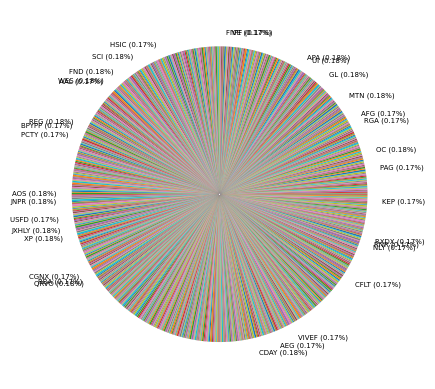

In [62]:
# Plot the market caps
plot_market_caps(mid_df, 0.0017)

There were 1,204 mid-cap stocks in the database. They had a mean market cap value of $4.59 billion and a mean EPS (TTM) of $2.82. The median market cap and EPS (TTM) were $4.01 billion and $1.34 respectively.

## Large-Cap
In this section we will analyze the mean and median market cap and EPS (TTM) for a large-cap company.

In [63]:
# Create a dataframe of large cap stocks
large_df = df[(df['market_cap'] >= 10) & (df['market_cap'] < 200)]
large_df.head()

,date,ticker,market_cap,eps_ttm
8231,2023-06-01,FCNCB,17.750,704.37
549,2023-06-01,FCNCA,18.308,704.29
551,2023-06-01,NVR,18.087,469.33
255,2023-06-01,AZO,43.258,121.01
116,2023-06-01,BKNG,94.181,99.60


In [64]:
# Describe the large_cap DataFrame
large_df.describe()

,market_cap,eps_ttm
count,839.000000,839.000000
mean,41.134426,7.472992
std,38.231712,38.893181
min,10.000000,-28.850000
25%,15.191500,0.940000
50%,26.452000,3.080000
75%,50.335500,6.875000
max,199.488000,704.370000


In [65]:
# Find the median market cap
median_market_cap_for_large_cap = large_df["market_cap"].median()
print("Median: " + str(median_market_cap_for_large_cap))

Median: 26.452


In [66]:
# Find the median EPS (TTM)
median_eps_for_large_cap = large_df["eps_ttm"].median()
print("Median: " + str(median_eps_for_large_cap))

Median: 3.08


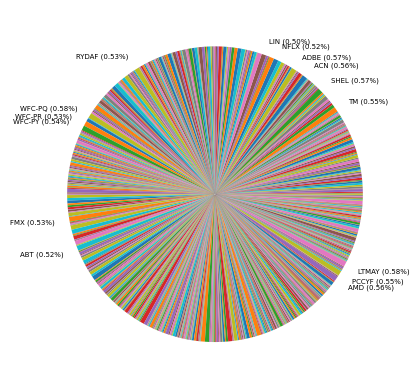

In [67]:
# Plot the market caps
plot_market_caps(large_df, 0.005)

There were 839 large-cap stocks in the database. They had a mean market cap value of $41.13 billion and a mean EPS (TTM) of $7.47. The median market cap and EPS (TTM) were $26.45 billion and $3.08 respectively.

## Mega-Cap
In this section we will analyze the mean and median market cap and EPS (TTM) for a mega-cap companies.

In [68]:
mega_df = df[(df['market_cap'] > 200)]
mega_df.head()

,date,ticker,market_cap,eps_ttm
8163,2023-06-01,LVMHF,444.817,30.01
22,2023-06-01,AVGO,329.349,29.65
11,2023-06-01,UNH,459.585,21.88
26,2023-06-01,ASML,290.166,18.58
8166,2023-06-01,ASMLF,288.402,18.56


In [69]:
# Describe the mega-cap dataframe
mega_df.describe()

,market_cap,eps_ttm
count,54.000000,54.000000
mean,484.616556,7.494630
std,527.262004,6.909051
min,200.336000,0.220000
25%,229.027000,3.390000
50%,290.054000,4.615000
75%,437.774250,9.275000
max,2833.000000,30.010000


In [70]:
# Find the median market cap
median_market_cap_for_mega_cap = mega_df["market_cap"].median()
print("Median: " + str(median_market_cap_for_mega_cap))

Median: 290.054


In [71]:
# Find the median EPS (TTM)
median_eps_for_mega_cap = mega_df["eps_ttm"].median()
print("Median: " + str(median_eps_for_mega_cap))

Median: 4.615


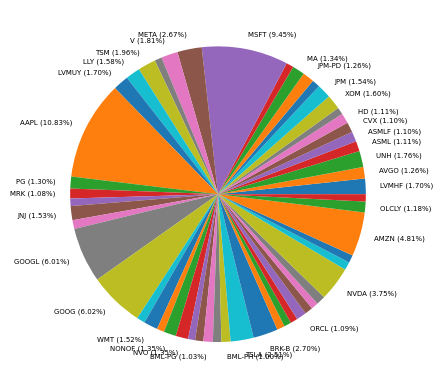

In [72]:
# Chart the mega-cap copmanies
plot_market_caps(mega_df, 0.01)

There were 54 mega-cap stocks in the database. They had a mean market cap value of $484.61 billion and a mean EPS (TTM) of $7.49. The median market cap and EPS (TTM) were $290.05 billion and $4.61 respectively.

## Overall Charting
After having taken a look at the data we will analyze the differences between the median market cap and EPS (TTM) for the various categorizations of stocks.

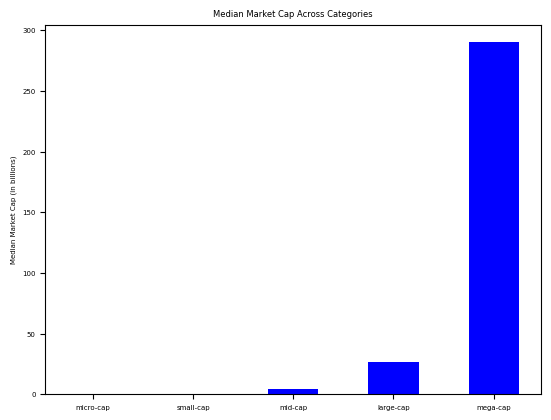

In [73]:
# Chart the data
categories = ["micro-cap", "small-cap", "mid-cap", "large-cap", "mega-cap"]
market_cap_values = [median_market_cap_for_micro_cap, median_market_cap_for_small_cap, median_market_cap_for_mid_cap, median_market_cap_for_large_cap, median_market_cap_for_mega_cap]

plt.bar(categories, market_cap_values, color="blue", width=0.5)
plt.ylabel("Median Market Cap (in billions)")
plt.title("Median Market Cap Across Categories")
plt.show()


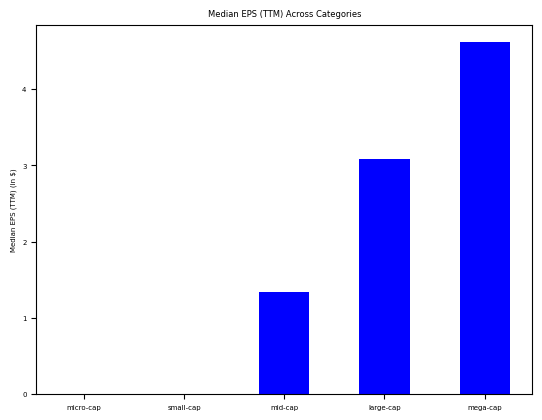

In [74]:
eps_values = [median_eps_for_micro_cap, median_eps_for_small_cap, median_eps_for_mid_cap, median_eps_for_large_cap, median_eps_for_mega_cap]
# Zero out negative values
for i in range(len(eps_values)):
    if eps_values[i] < 0:
        eps_values[i] = 0
plt.bar(categories, eps_values, color="blue", width= 0.5)
plt.ylabel("Median EPS (TTM) (in $)")
plt.title("Median EPS (TTM) Across Categories")
plt.show()

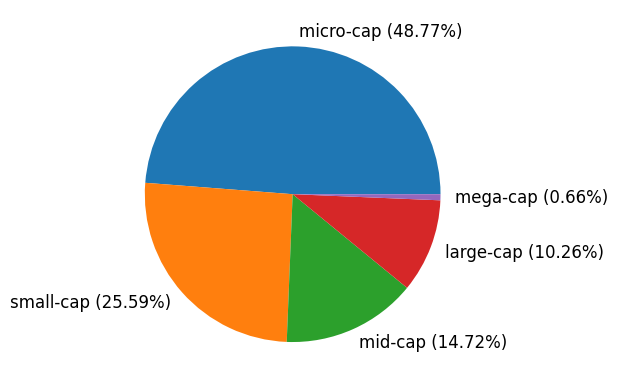

In [77]:
# Get the %'s that each company made up
len_of_micro = len(micro_df)
len_of_small = len(small_df)
len_of_mid = len(mid_df)
len_of_large = len(large_df)
len_of_mega = len(mega_df)

all_lens = [len_of_micro, len_of_small, len_of_mid, len_of_large, len_of_mega]

plot_lens(categories, all_lens, 0)

## Conclusion

Based on the data drawn we can see that micro-cap stocks make up the largest percentage of the US stock market with small-cap, mid-cap, and large-cap making up most of the rest. Mega-Cap stocks made up an insignificant amount of the US stock market. We can also conclude from the data that the average EPS (TTM) for a stock increased based on its market cap category with mega-caps having the highest median EPS (TTM).